David Díaz Paz y Puente | 650794
"Doy mi palabra que he realizado esta actividad con integridad académica."

# Proyecto Final – Unidad 1 

## 1) Planteamiento del problema y contexto de los datos

La pobreza en México constituye una problemática multidimensional y persistente. De acuerdo con el Consejo Nacional de Evaluación de la Política de Desarrollo Social (CONEVAL), una persona se encuentra en situación de pobreza cuando presenta al menos una carencia social (rezago educativo, acceso a servicios de salud, acceso a la seguridad social, calidad y espacios de la vivienda, servicios básicos en la vivienda y acceso a la alimentación) y, simultáneamente, su ingreso es insuficiente para adquirir los bienes y servicios necesarios para satisfacer sus necesidades alimentarias y no alimentarias (CONEVAL, s. f.). En el caso de la pobreza extrema, la condición se agrava al acumular un mayor número de carencias y contar con un ingreso tan reducido que, aún destinandolo por completo a la alimentación, no permitiría cubrir los requerimientos nutricionales mínimos para una vida saludable (CONEVAL, s. f.). <br>


En este contexto, el presente estudio propone el desarrollo de modelos de regresión orientados a estimar y analizar el ingreso trimestral per cápita de los hogares como una aproximación cuantitativa a su situación socioeconómica, a partir de las características y categorías asociadas a viviendas en México. De esta manera, se busca identificar en qué medida las condiciones estructurales, los servicios disponibles y la calidad habitacional se relacionan con el nivel de ingreso del hogar, permitiendo aproximar su posición dentro del espectro socioeconómico.<br>


El análisis se enfoca en Nuevo Leon, Mexico, durante 2024, y utiliza una base de datos construida a partir de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) del INEGI, integrando variables de vivienda y de ingreso mediante el identificador común de vivienda. En la práctica, el ingreso per cápita estimado se contrastará con umbrales oficiales de referencia definidos por CONEVAL para el ámbito urbano y rural, conocidos como Línea de Pobreza por Ingresos (LPI), que equivale al valor monetario total de la canasta alimentaria más la canasta no alimentaria por persona al mes, y Línea de Pobreza Extrema por Ingresos (LPEI), que equivale al valor monetario de la canasta alimentaria por persona al mes, lo cual permite interpretar los resultados del modelo en términos de vulnerabilidad económica. Para efectos de este trabajo se considera la LPI urbana mensual reportada por CONEVAL: 4,640.16 pesos (CONEVAL, 2025, p. 2). Convertida a una escala trimestral, multiplicamos el valor por 3, lo que resulta en 13,920.48 pesos. Este último será utilizado como punto de comparación para clasificar de manera operativa la situación por ingresos de los hogares dentro del conjunto de datos. <br> <br>

![Linea pobreza por ingreso](figuras/linea_pobreza_ingresos_coneval.png) <br>

_Figura 1. Valores monetarios mensuales por persona a pesos corrientes en México en la primera mitad del año 2024._ 

## 2) Exploración y comprension del dataset 

In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv('base_pobreza.csv')
diccionario = pd.read_csv('diccionario_datos.csv')
print(df.shape)

(3767, 31)


El dataframe (`df`) se compone de 3767 observaciones (filas) y 31 variables (columnas). 

In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    3767 non-null   int64  
 1   tipo_viv    3767 non-null   object 
 2   mat_pared   3767 non-null   int64  
 3   mat_techos  3767 non-null   int64  
 4   mat_pisos   3767 non-null   int64  
 5   cocina      3767 non-null   int64  
 6   cocina_dor  3662 non-null   float64
 7   cuart_dorm  3767 non-null   int64  
 8   num_cuarto  3767 non-null   int64  
 9   lugar_coc   3767 non-null   int64  
 10  ab_agua     3538 non-null   float64
 11  dotac_agua  3538 non-null   float64
 12  excusado    3767 non-null   int64  
 13  uso_compar  3740 non-null   float64
 14  sanit_agua  3740 non-null   float64
 15  bano_comp   3767 non-null   object 
 16  bano_excus  3767 non-null   object 
 17  bano_regad  3767 non-null   object 
 18  drenaje     3767 non-null   int64  
 19  disp_elect  3767 non-null  

Cada fila representa una observacion identificada por `folioviv` (identificador de la vivienda). Las variables se enfocan en condiciones físicas de la vivienda (materiales de pared/techo/piso), servicios basicos (agua, drenaje, electricidad, sanitario, basura), características de ocupación (tenencia, escrituras), estructura del hogar (residentes totales y por sexo) y, finalmente, un bloque económico que sirve como objetivo para el modelo de pobreza: `ing_tri` (ingreso trimestral total) y `ing_tri_pc` (ingreso trimestral per capita).

En cuanto a tipos de dato, predominan variables int64 (18) que en este contexto representan códigos de catálogo (categorías numéricas; se explorarán a profundidad con el diccionario del conjunto), float64 (8) donde aparecen ingresos y también variables con faltantes, y object (5) son variables categóricas que se leyeron como texto (por ejemplo `tipo_viv`, `bano_comp`, `bano_excus`, `bano_regad`, `estim_pago`). Sobre la completitud, varias columnas presentan valores faltantes: `cocina_dor` tiene 105 nulos (3767-3662), `ab_agua` y `dotac_agua` tienen 229 nulos cada una (3767-3538), `uso_compar` y `sanit_agua` tienen 27 nulos cada una (3767-3740), y el caso mas relevante es `escrituras` con 943 nulos (3767-2824), es decir, alrededor de una cuarta parte del conjunto. 

Es importante mencionar que para la variable `estim_pago`, aunque parezca no tener huecos dentro de la base de datos, la realidad es que al ser de tipo object, pandas cuenta esas cadenas como “no nulas”, por eso df.info() te dice 3767 non-null aunque “visualmente” parezcan faltantes.

A continuación se presenta un diccionario que describe cada variable de manera contextual a la base de datos.

In [96]:
print(diccionario)

                          nombre_campo tipo    nemónico    catálogo  \
0         Identificador de la vivienda    C    folioviv         NaN   
1                     Tipo de vivienda    C    tipo_viv    tipo_viv   
2                  Material de paredes    C   mat_pared   mat_pared   
3                   Material de techos    C  mat_techos  mat_techos   
4                    Material de pisos    C   mat_pisos   mat_pisos   
5                         Tiene cocina    C      cocina       si_no   
6         Utiliza cocina de dormitorio    C  cocina_dor       si_no   
7                   Cuartos dormitorio    N  cuart_dorm         NaN   
8                    Número de cuartos    N  num_cuarto         NaN   
9                  Lugar donde cocinan    C   lugar_coc   lugar_coc   
10              Abastecimiento de agua    C     ab_agua     ab_agua   
11                    Dotación de agua    C  dotac_agua  dotac_agua   
12                      Tiene excusado    C    excusado    excusado   
13    

El diccionario describe un conjunto de 31 variables organizadas en torno a tres ejes principales: características físicas de la vivienda, disponibilidad de servicios básicos y condiciones socioeconomicas del hogar. A su vez, estas variables se clasifican en dos tipos de dato: C (categórico) y N (numérico).

La mayor parte de las variables se reporta como categórica (tipo C). Sin embargo, al observar la estructura de `df`, se identifica que una proporción importante de estas variables aparece almacenada con tipo int64. Esto es consistente con el uso de códigos numéricos para representar categorías, por lo que no deben interpretarse como valores continuos. En consecuencia, para una lectura adecuada del diccionario y para asegurar un tratamiento correcto en el análisis y en la modelación, es necesario complementar la interpretación mediante los catálogos asociados a cada variable, los cuales describen el significado de cada clave.

Con el fin de mantener el reporte conciso y evitar extensiones innecesarias, a continuación se presenta el acceso a los catálogos correspondientes a cada variable incluida en el estudio.

- [ab_agua](catalogos/ab_agua.csv)
- [combus](catalogos/combus.csv)
- [disp_elect](catalogos/disp_elect.csv)
- [dotac_agua](catalogos/dotac_agua.csv)
- [drenaje](catalogos/drenaje.csv)
- [eli_basura](catalogos/eli_basura.csv)
- [escrituras](catalogos/escrituras.csv)
- [est_socio](catalogos/est_socio.csv)
- [excusado](catalogos/excusado.csv)
- [lugar_coc](catalogos/lugar_coc.csv)
- [mat_pared](catalogos/mat_pared.csv)
- [mat_pisos](catalogos/mat_pisos.csv)
- [mat_techos](catalogos/mat_techos.csv)
- [sanit_agua](catalogos/sanit_agua.csv)
- [tenencia](catalogos/tenencia.csv)
- [tipo_viv](catalogos/tipo_viv.csv)

Los catálogos proporcionan la correspondencia entre las claves numéricas y el significado descriptivo de cada categoría, lo cual permite interpretar correctamente variables codificadas como valores enteros. Estos rangos varían según la variable; por ejemplo, `ab_agua` cuenta con siete opciones (1–7) que describen la fuente de abastecimiento: (1) servicio público de agua, (2) pozo comunitario, (3) pozo particular, (4) pipa, (5) otra vivienda, (6) lluvia y (7) otro lugar. 

In [97]:
print(df.head(5))

     folioviv tipo_viv  mat_pared  mat_techos  mat_pisos  cocina  cocina_dor  \
0  1906156202        2          8          10          2       1         2.0   
1  1906156203        2          8          10          2       1         2.0   
2  1906156204        1          8          10          3       1         2.0   
3  1906156407        1          8          10          2       1         2.0   
4  1906156408        1          7          10          3       1         2.0   

   cuart_dorm  num_cuarto  lugar_coc  ...  eli_basura  tenencia  estim_pago  \
0           2           4          1  ...           1         4        3000   
1           2           4          1  ...           1         1               
2           2           5          1  ...           1         4        3000   
3           1           3          1  ...           1         4        3000   
4           3           4          1  ...           1         1               

   escrituras  tot_resid tot_hom tot_muj est

Por último, tras revisar la estructura del dataframe, así como una muestra representativa de sus datos, es posible definir la metodología inicial que se seguirá para la limpieza y preparación de la información. Para esta etapa se identifican como principales retos del `df` la presencia de datos faltantes, la codificación numérica de variables categóricas y la existencia de valores atípicos (outliers), los cuales deberán abordarse de manera sistemática para garantizar la calidad del análisis y la validez de los modelos posteriores.

## 3) Preparación y tratamiento de datos 

### Problema A: valores faltantes

Recordando la completitud de los datos, las variables que presentan valores faltantes son las siguientes:

1. `uso_compar` y `sanit_agua` (27 nulos = 3767-3740) 
2. `cocina_dor` (105 nulos = 3767-3662)
3. `ab_agua` y `dotac_agua` (229 nulos = 3767-3538)
4. `estim_pago` (470 nulos = 3767-3297)

Adicionalmente, falta estudiat preparar la variable `escrituras`, desde encontrar los valores nulos y reemplazarlos hasta actualizar el tipo de dato.  

A partir de esta información, surge la necesidad de implementar métodos de imputación acordes con la naturaleza de cada variable que presente valores faltantes. Se descarta la alternativa de eliminar observaciones, ya que ello implicaría una reducción significativa del tamaño muestral y podría introducir un sesgo de selección, al asumir implícitamente que la ausencia de datos es completamente aleatoria. 

In [98]:
print(diccionario.loc[[13, 14, 6, 10, 11, 23, 24]])

                    nombre_campo tipo    nemónico    catálogo   rango_claves
13  Uso compartido del sanitario    C  uso_compar       si_no          [1-2]
14       Sanitario conexión agua    C  sanit_agua  sanit_agua          [1-3]
6   Utiliza cocina de dormitorio    C  cocina_dor       si_no          [1-2]
10        Abastecimiento de agua    C     ab_agua     ab_agua          [1-7]
11              Dotación de agua    C  dotac_agua  dotac_agua          [1-5]
23  Estimación del pago de renta    N  estim_pago         NaN  [1-999999999]
24     Escrituras de la vivienda    C  escrituras  escrituras          [1-4]


Para variables categóricas con valores faltantes marginales se utilizará imputación por moda, dado su bajo impacto sobre la distribución. 

In [99]:
## Imputacion por moda para variables marginales (no se toca 'escrituras' ni 'estim_pago' porque se tratara aparte)

# Columnas con NA (excluyendo 'escrituras' porque se tratara aparte)
na_cols = [c for c in df.columns if df[c].isna().any() and c != "escrituras" and c != "estim_pago"]

print("Columnas con NA (excepto escrituras):", na_cols)

for c in na_cols:
    mode_series = df[c].mode(dropna=True)
    if mode_series.empty:
        # Si por alguna razon no hay moda (columna vacia), se omite
        print(f"[WARN] {c}: no se encontro moda. Se omite.")
        continue
    
    mode_value = mode_series.iloc[0]
    df[c] = df[c].fillna(mode_value)

print("\nImputacion por moda aplicada a variables marginales.")

Columnas con NA (excepto escrituras): ['cocina_dor', 'ab_agua', 'dotac_agua', 'uso_compar', 'sanit_agua']

Imputacion por moda aplicada a variables marginales.


En el caso de `escrituras`, primero realizamos un conteo de las observaciones nulas que contiene:

In [100]:
nulos_antes = df["escrituras"].isna().sum()
print(f"Nulos en 'escrituras' antes de imputar: {nulos_antes}")

Nulos en 'escrituras' antes de imputar: 943


Debido a la alta proporción de faltantes (943, aproximadamente un 25% del total de observaciones) y a que su catálogo ya incluye la categoría “No sabe” (4), se generará una categoría adicional indicadora de faltas de respuesta (a partir de esto se crearán finalmente las variables dummy): 5; no respondio (NaN original). De este modo, se preserva la muestra completa y se permite al modelo capturar posibles patrones asociados a la no respuesta, reduciendo el riesgo de distorsión sistemática.

In [101]:
## Imputacion por valor fijo para 'escrituras' (categoría adicional: 5 = "No respondio (faltante original)")

df["escrituras"] = df["escrituras"].fillna(5)
print("Imputacion por valor fijo aplicada a 'escrituras'.")

Imputacion por valor fijo aplicada a 'escrituras'.


Para la variable numérica `estim_pago` se realizará una imputación por mediana, debido tanto a la practicidad y a la robustez que ofrece este método ante valores atípicos (los cuales encontramos dentro de observaciones de esta variable).

In [102]:
## Imputación por mediana para estim_pago (si es numérica, si no se puede convertir a numérica se omite)

# Normaliza a string para limpiar
s = df["estim_pago"].astype(str).str.strip()

# Convierte placeholders comunes a NaN
placeholders = {"", "NA", "N/A", "NULL", "null", "None", "nan", "NaN", "Sin dato", "No sabe"}
s = s.replace(list(placeholders), np.nan)

# Convierte a numerico (lo que no se pueda se vuelve NaN)
df["estim_pago"] = pd.to_numeric(s, errors="coerce")

global_median = df["estim_pago"].median(skipna=True)

# Fallback final a mediana global
df["estim_pago"] = df["estim_pago"].fillna(global_median)

print(f"Imputacion por mediana ({global_median}) aplicada a estim_pago.")

Imputacion por mediana (2500.0) aplicada a estim_pago.


Finalmente para resolver esta problemática, es necesario revisar el las variables cuyo tipo de dato es object. El tipo de dato object considera un espacio en blanco como un caracter válido, por ello es que, aunque en la salida de la función `print(df.info())` veamos completitud, al manualmente revisar los datos encontraremos huecos. 

In [103]:
print(diccionario.loc[[15, 16, 17]])

                    nombre_campo tipo    nemónico catálogo rango_claves
15  Baño con excusado y regadera    N   bano_comp      NaN        [0-9]
16        Baño solo con excusado    N  bano_excus      NaN        [0-9]
17        Baño solo con regadera    N  bano_regad      NaN        [0-9]


Por ejemplo, comenzaremos con la variable `tipo_vivi`. Dentro de dicha columna, se identificaron tres ocurrencias del carácter '&' en lugar de un valor numérico válido. Dado que el número de incongruencias es mínimo, se realizará una depuración puntual: se reemplazarán esas entradas por valores faltantes (NaN) y, posteriormente, se aplicará una imputación por moda para completar la información de la variable.

In [104]:
print("Frecuencias:")
print(df["tipo_viv"].value_counts(dropna=False).sort_index())

Frecuencias:
tipo_viv
&       3
1    3016
2     590
3      54
4      22
5      24
7      58
Name: count, dtype: int64


In [105]:
# 1) Limpiar el caracter raro
df["tipo_viv"] = df["tipo_viv"].astype(str).str.strip()
df.loc[df["tipo_viv"] == "&", "tipo_viv"] = np.nan   # convierte "&" a faltante real

# 2) Convertir de forma segura a entero categórico
df["tipo_viv"] = pd.to_numeric(df["tipo_viv"], errors="coerce").astype("Int64").astype("category")

# 3) Imputar por moda
if df["tipo_viv"].isna().any():
    moda = df["tipo_viv"].mode(dropna=True).iloc[0]
    df["tipo_viv"] = df["tipo_viv"].fillna(moda)

print("\nImputacion por moda aplicada a variable 'tipo_viv'.")


Imputacion por moda aplicada a variable 'tipo_viv'.


Por último, se revisaron las variables restantes de tipo object de acuerdo a la función `info()`: `bano_comp`, `bano_excus` y `bano_regad`. Esto con la finalidad de confirmar si es que existe alguna incongruencia dado a que el tipo de esta variable se debe a algún valor anormal dentro de lo que sería numérico. 

In [106]:
obj_clase = ["bano_comp", "bano_excus", "bano_regad"]

for c in obj_clase:
    # suponiendo que tienes la columna en tu df
    s = df[c].astype(str)
    # limpiar blancos (si vinieron como texto)
    s = s.astype(str).str.strip().replace("", np.nan)

    print("Frecuencias:")
    print(s.value_counts(dropna=False).sort_index(), "\n")


Frecuencias:
bano_comp
0       603
1      2390
2       618
3       104
4        20
5         5
NaN      27
Name: count, dtype: int64 

Frecuencias:
bano_excus
0      2408
1      1242
2        85
3         5
NaN      27
Name: count, dtype: int64 

Frecuencias:
bano_regad
0      3585
1       148
2         6
6         1
NaN      27
Name: count, dtype: int64 



La salida de este snippet del programa muestra que cada una de estas tres variables tiene 27 datos faltantes. Nuevamente, la función `print(df.info())` no resaltó correctamente las nulidades. Después de haber confirmado esta teoría, procedemos a rellenar aquellas observaciones NaN con el mismo método utilizado para variables categóricas: imputación por moda. 

In [107]:
## Imputación por mediana para variables de bano_comp, bano_excus, bano_regad 
for c in obj_clase:
    
    # 1) Convertir a string y limpiar espacios
    s = df[c].astype(str).str.strip()
    
    # 2) Reemplazar blancos por NaN reales
    s = s.replace("", np.nan)
    
    # 3) Convertir a numerico (lo no numerico -> NaN)
    s_num = pd.to_numeric(s, errors="coerce")
    
    # 4) Imputacion por mediana (si hay NaN)
    if s_num.isna().any():
        mediana = s_num.median(skipna=True)
        s_num = s_num.fillna(mediana)
        print(f"\nImputacion por mediana ({mediana}) aplicada a {c}")  
    
    # 5) Actualizar columna en el dataframe como int64
    df[c] = s_num.astype("int64")

# Verificacion final
print("\n")
print(df[obj_clase].info())


Imputacion por mediana (1.0) aplicada a bano_comp

Imputacion por mediana (0.0) aplicada a bano_excus

Imputacion por mediana (0.0) aplicada a bano_regad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bano_comp   3767 non-null   int64
 1   bano_excus  3767 non-null   int64
 2   bano_regad  3767 non-null   int64
dtypes: int64(3)
memory usage: 88.4 KB
None


### Problema B: variables categóricas codificadas como números

Retomemos que la base de datos utilizada se compone, en su mayoría, de variables categóricas. Una fracción menor corresponde a categorías binarias (si/no), mientras que una parte sustantiva incluye variables con múltiples niveles, en algunos casos de hasta siete categorías. En consecuencia, al aplicar codificación mediante variables dummy (one-hot encoding), es esperable que el número de variables explicativas se incremente de forma significativa respecto a la estructura original del conjunto de datos.

In [108]:
cat_cols = [
    "tipo_viv", "mat_pared", "mat_techos", "mat_pisos", "lugar_coc",
    "ab_agua", "dotac_agua", "excusado", "sanit_agua", "drenaje",
    "disp_elect", "combus", "eli_basura", "tenencia", "escrituras"
]

# Asegurar que existan en el dataframe (por si alguna no esta)
cat_cols = [c for c in cat_cols if c in df.columns]

# 1) Diagnostico: encontrar valores "raros" no numericos
for c in cat_cols:
    s = df[c].astype(str).str.strip()
    # valores que NO son numeros (permitiendo vacio y NaN)
    bad_mask = ~s.str.match(r"^-?\d+(\.0+)?$") & ~s.isin(["nan", "NaN", "None", ""])  # tolera NaN/vacios
    if bad_mask.any():
        print(f"\n[WARN] Valores no numericos detectados en {c}:")
        print(s[bad_mask].value_counts().head(10))

# 2) Conversion segura: lo no numerico -> NaN
for c in cat_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64").astype("category")

# drop_first=True evita multicolinealidad en modelos lineales
df_dum = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Columnas originales:", df.shape[1])
print("Columnas despues de dummies:", df_dum.shape[1])
print("\nColumnas dummy creadas:")
print(df_dum.columns)


Columnas originales: 31
Columnas despues de dummies: 87

Columnas dummy creadas:
Index(['folioviv', 'cocina', 'cocina_dor', 'cuart_dorm', 'num_cuarto',
       'uso_compar', 'bano_comp', 'bano_excus', 'bano_regad', 'estim_pago',
       'tot_resid', 'tot_hom', 'tot_muj', 'est_socio', 'ing_tri', 'ing_tri_pc',
       'tipo_viv_2', 'tipo_viv_3', 'tipo_viv_4', 'tipo_viv_5', 'tipo_viv_7',
       'mat_pared_2', 'mat_pared_3', 'mat_pared_4', 'mat_pared_5',
       'mat_pared_6', 'mat_pared_7', 'mat_pared_8', 'mat_techos_2',
       'mat_techos_3', 'mat_techos_4', 'mat_techos_5', 'mat_techos_6',
       'mat_techos_7', 'mat_techos_8', 'mat_techos_9', 'mat_techos_10',
       'mat_pisos_2', 'mat_pisos_3', 'lugar_coc_2', 'lugar_coc_3',
       'lugar_coc_4', 'lugar_coc_5', 'lugar_coc_6', 'ab_agua_2', 'ab_agua_3',
       'ab_agua_4', 'ab_agua_5', 'ab_agua_6', 'ab_agua_7', 'dotac_agua_2',
       'dotac_agua_3', 'dotac_agua_4', 'dotac_agua_5', 'excusado_2',
       'excusado_3', 'sanit_agua_2', 'sanit_agua

Para más información sobre las categorías de las variables se recomienda revisar los catálogos presentados en la sección _2) Exploración y comprension del dataset_.

### Problema C: distribución sesgada y outliers en ingreso

En este contexto, un número reducido de observaciones con valores extremadamente altos (outliers) puede dominar el ajuste del modelo y distorsionar las estimaciones, incrementando la variabilidad del error y debilitando la interpretabilidad de los resultados. Por ello, es necesario aplicar estrategias de tratamiento que reduzcan la influencia de estos valores extremos y estabilicen la relación entre el ingreso y las variables explicativas.

In [109]:
COL = "ing_tri_pc" 

x = pd.to_numeric(df_dum[COL], errors="coerce")

print("\nTop 10 valores más altos:")
print(x.sort_values(ascending=False).head(10).to_string(index=False))

print("\nTop 10 valores más bajos:")
print(x.sort_values(ascending=True).head(10).to_string(index=False))



Top 10 valores más altos:
8686956.5150
 653736.2580
 574092.3840
 424599.5500
 392090.1625
 372502.1700
 340862.7675
 296796.1900
 294889.4500
 277868.8300

Top 10 valores más bajos:
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
146.735000
277.173333


Dado que los valores iguales a cero representan menos del 0.3% de la muestra (8 de 3767), no se consideran problemáticos ni influyen significativamente en la distribución, por lo tanto se optó por conservar dichos casos dentro del conjunto de datos.

Asimismo, las marcadas diferencias de magnitud entre los valores más altos y más bajos evidencian la conveniencia de aplicar una transformación o normalización de la variable de ingreso, con el fin de reducir la influencia de valores extremos y mejorar la estabilidad del análisis y del ajuste del modelo.

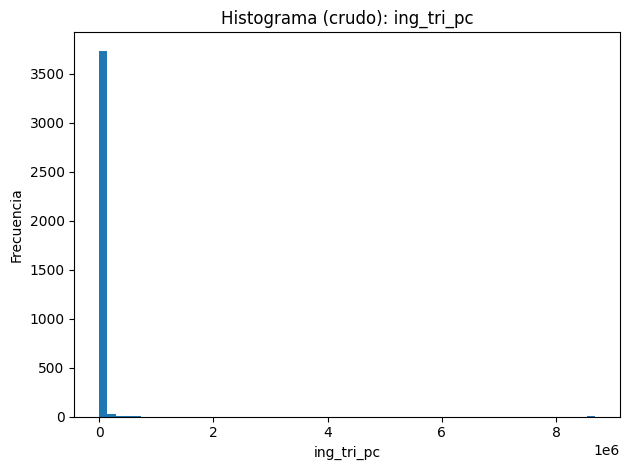

In [110]:
import matplotlib.pyplot as plt

TARGET_COL = "ing_tri_pc"

y_raw = pd.to_numeric(df_dum[TARGET_COL], errors="coerce")
y = y_raw.dropna().copy()

plt.figure()
plt.hist(y, bins=60)
plt.title(f"Histograma (crudo): {TARGET_COL}")
plt.xlabel(TARGET_COL)
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


En los ingresos crudos (`ing_tri_pc`), la presencia de unos pocos valores extremadamente altos “estira” la gráfica, generando una distribución desequilibrada (asimétrica). En este sentido, la transformación `log1p` contribuye a comprimir los valores elevados y a reducir la asimetría, aproximando la forma de los datos a una distribución más cercana a una campana. Al aplicar logaritmo, los valores muy altos se comprimen (se acercan entre si), mientras que los valores bajos cambian menos.

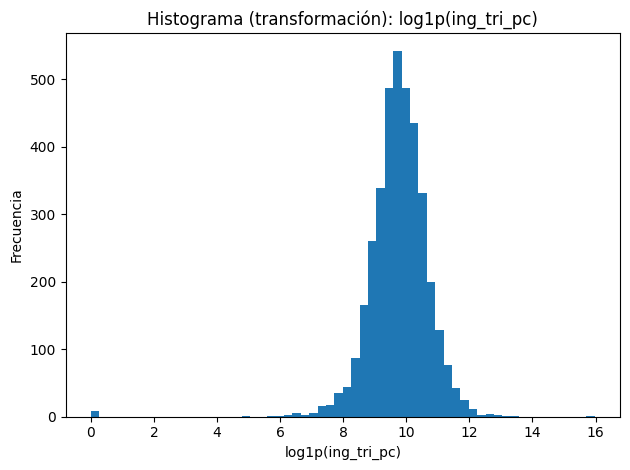

In [111]:
y_log = np.log1p(y)

plt.figure()
plt.hist(y_log, bins=60)
plt.title(f"Histograma (transformación): log1p({TARGET_COL})")
plt.xlabel(f"log1p({TARGET_COL})")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

La transformación `log1p(ing_tri_pc)` consiste en aplicar un logaritmo natural al ingreso trimestral per cápita, pero sumando 1 antes de transformar: $log(1 + x)$. Se eligió esta transformación porque los ingresos suelen presentar una distribución fuertemente asimétrica con cola larga hacia la derecha: la mayoría de los hogares se concentra en valores relativamente bajos o medios, mientras que un número pequeño registra ingresos muy altos.

En terminos interpretativos, modelar `log1p(ing_tri_pc)` implica que los cambios en las variables explicativas se relacionan con cambios relativos (porcentuales) en el ingreso mas que con cambios absolutos, lo cual suele ser mas razonable en fenómenos económicos.


In [112]:
# Almacenamos la variable transformada en el dataframe final (con NaN donde no se pudo calcular)
df_dum["y_log_ing_tri_pc"] = np.log1p(pd.to_numeric(df_dum[TARGET_COL], errors="coerce")).where(df_dum[TARGET_COL].notna(), np.nan)

# Target robusto (evita NaN/-inf por negativos)
y_raw = pd.to_numeric(df["ing_tri_pc"], errors="coerce")

# Opcion A (conservadora): filtra valores invalidos
mask = y_raw.notna() & (y_raw >= 0)
df_model = df.loc[mask].copy()

## 4) Selección de caracteristicas 

Comenzaremos analizando colinealidad dentro de nuestro dataframe. El dataset incluye `tot_resid`, `tot_hom` y `tot_muj`, donde `tot_resid` = `tot_hom` + `tot_muj` por construcción. Esto introduce multicolinealidad perfecta. Es redundante tener ambos datos, por ello, alternativamente, se creará una proporción más informativa entre ambas variables explicativas.

In [113]:
df_dum["prop_muj"] = df_dum["tot_muj"] / df_dum["tot_resid"].replace(0, np.nan)
print("Variable 'prop_muj' creada como tot_muj / tot_resid (con NaN donde tot_resid=0).")

Variable 'prop_muj' creada como tot_muj / tot_resid (con NaN donde tot_resid=0).


La variable `est_socio` es el estrato socioeconómico del hogar, una variable que en la ENIGH/INEGI se construye a partir del ingreso o del gasto del hogar. Incluirla como predictor de ing_tri_pc es un caso de target leakage: el modelo aprende a predecir el ingreso usando una variable que ya codifica el ingreso, lo que infla artificialmente las métricas y anula la utilidad predictiva fuera de muestra. Por ello es que también será separada de las características del modelo. 

La variable `folioviv` representa un identificador de vivienda diferente para cada observación. De acuerdo a la fuente, esta no representa una métrica encargada de medir alguna situación de vivienda relacionada con la ENIGH. 

Se retiran las variables `tot_hom` y `tot_muj` por redundancia; ya contamos con una variable sustituto de proporción. 

Asimismo, como fue mencionado en la sección anterior, la variable objetivo para nuestro modelo será `y_log_ing_tri_pc`.

In [114]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ─── 1. Separación de variables──────────────────────────────────────────────────

# Separar la variable objetivo y las características
X = df_dum.drop(columns=[
    "ing_tri", "ing_tri_pc", "y_log_ing_tri_pc", "folioviv",
    "est_socio",
    "tot_hom",    # ← eliminar: tot_resid = tot_hom + tot_muj (redundante)
    "tot_muj",    # si usamos prop_muj en su lugar
])

y = df_dum["y_log_ing_tri_pc"] # Variable objetivo transformada (log1p)

La selección se complementó con validación cruzada mediante LassoCV, evaluando una grilla de 100 valores de λ en escala logarítmica a través de cinco pliegues con KFold(n_splits=5, shuffle=True, random_state=42), lo que permitió identificar el valor óptimo de λ = 0.0122 que minimiza el error de predicción fuera de muestra.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ─── 2. Escalado (fit solo en train) ───────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # ✅ fit_transform en train
X_test_scaled  = scaler.transform(X_test)         # ✅ solo transform en test

# ─── 3. LassoCV con reproducibilidad ───────────────────────────────────────────
# KFold con shuffle y semilla fija
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 100),  # grilla explícita de 100 valores log-uniformes
    cv=kf,
    max_iter=10_000,
    random_state=42
)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha (λ) seleccionado por LassoCV: {lasso_cv.alpha_:.6f}")

# ─── 4. Features seleccionadas ─────────────────────────────────────────────────
coef_dict = dict(zip(X.columns, lasso_cv.coef_))
selected_features = [f for f, c in coef_dict.items() if c != 0]

print(f"\n{len(selected_features)} features seleccionadas (coef ≠ 0):")
for i, (feat, coef) in enumerate(
    sorted(((f,c) for f,c in coef_dict.items() if c != 0),
           key=lambda x: abs(x[1]), reverse=True), 1
):
    print(f"  {i:2d}. {feat:<30s}: {coef:+.6f}")

Mejor alpha (λ) seleccionado por LassoCV: 0.011768

44 features seleccionadas (coef ≠ 0):
   1. tot_resid                     : -0.187352
   2. estim_pago                    : +0.135645
   3. combus_4                      : +0.131302
   4. excusado_2                    : -0.114154
   5. eli_basura_4                  : -0.104893
   6. prop_muj                      : -0.101682
   7. bano_comp                     : +0.092576
   8. mat_pisos_3                   : +0.070092
   9. combus_3                      : +0.058284
  10. tenencia_2                    : -0.057514
  11. lugar_coc_5                   : -0.052648
  12. bano_excus                    : +0.043870
  13. ab_agua_7                     : -0.042996
  14. drenaje_2                     : -0.040827
  15. bano_regad                    : +0.040337
  16. tenencia_4                    : -0.040030
  17. eli_basura_5                  : -0.038023
  18. mat_pared_7                   : -0.037523
  19. excusado_3                    : -0.03385

 De las variables disponibles en el dataset de viviendas de la ENIGH Nuevo León 2024, LASSO retuvo 43 características con coeficiente distinto de cero, entre las que destacan por magnitud `estim_pago` (pago estimado por la vivienda), excusado_2 (ausencia de excusado conectado a red), `tot_resid` (total de residentes del hogar) y combus_4 (uso de gas natural como combustible), todas ellas sobre la variable objetivo `log1p(ing_tri_pc)`.

## 5) Construcción y comparación de modelos

### A. Modelo lineal (para interpretacion)

El siguiente snippet ajusta un modelo de Mínimos Cuadrados Ordinarios (OLS) sobre el subconjunto de variables que LASSO seleccionó previamente. Primero filtra el conjunto de entrenamiento para quedarse solo con las selected_features y convierte sus tipos a float para compatibilidad con statsmodels. Luego agrega una columna de unos como intercepto (β₀) mediante sm.add_constant. Con eso define y ajusta el modelo OLS, e imprime un resumen estadístico completo que incluye coeficientes, errores estándar, p-valores, intervalos de confianza y métricas globales como R² y el estadístico F.

In [116]:
import statsmodels.api as sm

# ─── 5. Modelo de regresión con train set───────────────────────────────────────

X_train_sel = X_train[selected_features].astype(float)
X_train_sm = sm.add_constant(X_train_sel)   # agrega intercepto β₀

model = sm.OLS(y_train,X_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       y_log_ing_tri_pc   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     43.94
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          1.65e-285
Time:                        13:24:56   Log-Likelihood:                -3408.1
No. Observations:                3013   AIC:                             6906.
Df Residuals:                    2968   BIC:                             7177.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.8022      0.212     46.178   

El modelo explica el 39.4% de la varianza del ingreso trimestral per cápita (R² = 0.394), cifra que desciende marginalmente a 38.5% al penalizar por el número de predictores (R² ajustado = 0.385), lo que indica que las 44 variables incluidas están genuinamente aportando y no inflando el ajuste artificialmente. El estadístico F = 43.94 con p < 0.001 confirma que el modelo en su conjunto es altamente significativo: la probabilidad de obtener este resultado por azar es prácticamente nula. Un R² de ~0.39 es razonable para datos de encuesta de hogares, donde una proporción importante de la variabilidad del ingreso responde a factores no observables en las variables de vivienda, como el nivel educativo, la ocupación o el número de perceptores de ingreso en el hogar.

Variables con efecto positivo sobre el ingreso y su significado de acuerdo a su respectivo catálogo:

- `combus_4` (β = 0.423): "Gas natural o de tubería"
- `tipo_viv_4` (β = 0.490): "Departamento en edificio"
- `disp_elect_5` (β = 0.545): "No tiene luz eléctrica"
- `combus_3` (β = 0.262): "Gas de tanque"
- `estim_pago` (β = 3.53×10⁻⁵): Por cada peso adicional en el pago estimado de renta o valor de la vivienda, el ingreso per cápita aumenta marginalmente.
- `escrituras_5` (β = 0.127): "No respondió" (categoría añadida al resolver Problema A)
- `dotac_agua_4` (β = 0.235, p = 0.087): "Una vez por semana"

Variables con efecto negativo sobre el ingreso:

- `eli_basura_5` (β = −1.857): "La entierran"
- `lugar_coc_5` (β = −1.012): "Al aire libre"
- `tot_resid` (β = −0.117): Por cada residente adicional en el hogar, el ingreso per cápita cae aproximadamente 11%
- `prop_muj` (β = −0.453): A mayor proporción de mujeres en el hogar, menor el ingreso per cápita — una reducción de 36.5% en el extremo. 
- `tenencia_2` (β = −0.299) y tenencia_5 (β = −0.354): "Es prestada" y "Está intestada o en litigio", respectivamente
- `excusado_2` (β = −0.358) y excusado_3 (β = −0.440): "Letrina (pozo y hoyo)" y "No tienen taza de baño ni letrina", respectivamente
- `escrituras_4` (β = −0.365): "4","No sabe"

El intercepto (β₀ = 9.8022) representa el valor predicho de `log1p(ing_tri_pc)` cuando todas las variables del modelo valen cero. Para traducirlo a pesos, se aplica la transformación inversa: $e^{9.8022} - 1 \approx 18{,}071 \text{ MXN}$. 

Lo relevante es contrastarlo con los umbrales de CONEVAL. Ese ingreso base de 18,071 MXN supera la LPI trimestral urbana de referencia (13,920 MXN), lo que indica que el hogar típico de la categoría base ya estaría por encima de la línea de pobreza por ingresos. Cada coeficiente del modelo ajusta ese punto de partida hacia arriba o hacia abajo dependiendo de las condiciones específicas del hogar, pudiendo llevarlo por debajo del umbral cuando acumula carencias como ausencia de excusado, eliminación de basura por quema, cocina a la intemperie o alta densidad de residentes.



### B. Modelo no lineal (para desempeño)

Para capturar relaciones no lineales entre las características de vivienda y el ingreso per cápita, se construyó un modelo de regresión polinomial de grado 2 combinado con regularización Ridge. Se incorpora Ridge como regularizador: penaliza la norma L₂ de los coeficientes, encogiéndolos hacia cero y evitando que el modelo memorice el ruido y tendiendo hacia un sobreajuste. 

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

# ─── Datos: solo features seleccionadas por LASSO (arrays numpy) ─────────────
X_tr_sel = X_train[selected_features].astype(float).values
X_te_sel = X_test[selected_features].astype(float).values

# ─── Pipeline: Escalado → PolynomialFeatures(g=2) → RidgeCV ─────────────────
alphas_ridge = np.logspace(-2, 6, 100)   # grilla amplia para Ridge

pipe_poly = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=alphas_ridge, cv=kf, scoring='r2')
)

pipe_poly.fit(X_tr_sel, y_train)

ridge_model  = pipe_poly.named_steps['ridgecv']
n_poly_feats = pipe_poly.named_steps['polynomialfeatures'].n_output_features_

print(f"Features originales (LASSO):         {len(selected_features)}")
print(f"Features polinomiales (grado 2):     {n_poly_feats}")
print(f"Mejor alpha Ridge (validación cruzada): {ridge_model.alpha_:.4f}")

# ─── Nombres de features polinomiales ────────────────────────────────────────
poly_step    = pipe_poly.named_steps['polynomialfeatures']
scaler_step  = pipe_poly.named_steps['standardscaler']
ridge_step   = pipe_poly.named_steps['ridgecv']

# Nombres originales → PolynomialFeatures genera nombres automáticamente
poly_feature_names = poly_step.get_feature_names_out(selected_features)

# ─── Coeficientes Ridge ───────────────────────────────────────────────────────
coef_ridge = ridge_step.coef_   # array de longitud n_poly_feats

df_ridge_coef = (
    pd.DataFrame({
        "feature": poly_feature_names,
        "coeficiente": coef_ridge
    })
    .assign(abs_coef=lambda d: d["coeficiente"].abs())
    .sort_values("abs_coef", ascending=False)
    .drop(columns="abs_coef")
    .reset_index(drop=True)
)

print(f"Total de coeficientes: {len(df_ridge_coef)}")
print(f"\nTop 20 coeficientes (|β| más alto):")
print(df_ridge_coef.head(20).to_string(index=False))

print(f"\nBottom 10 coeficientes (|β| más bajo):")
print(df_ridge_coef.tail(10).to_string(index=False))

Features originales (LASSO):         44
Features polinomiales (grado 2):     1034
Mejor alpha Ridge (validación cruzada): 6579.3322
Total de coeficientes: 1034

Top 20 coeficientes (|β| más alto):
                  feature  coeficiente
                tot_resid    -0.054721
                 prop_muj    -0.030121
           eli_basura_4^2    -0.029046
             excusado_2^2    -0.028530
              mat_pisos_3     0.028248
dotac_agua_5 escrituras_4    -0.026969
               estim_pago     0.026161
 lugar_coc_5 eli_basura_2    -0.023649
                bano_comp     0.022883
       tot_resid prop_muj     0.022732
 lugar_coc_4 dotac_agua_5    -0.021642
               prop_muj^2     0.021546
                drenaje_2    -0.020234
        combus_3 combus_4    -0.020141
                 combus_4     0.019887
     lugar_coc_4 prop_muj     0.019578
             eli_basura_4    -0.017765
   ab_agua_7 dotac_agua_4    -0.017693
              drenaje_2^2    -0.017623
               combus_4

Partiendo de las 44 features seleccionadas por LASSO, `PolynomialFeatures(degree=2)` generó 1,034 términos: 44 lineales (las features originales), 44 cuadráticos (cada variable elevada al cuadrado, ej. `tot_resid²`, `excusado_2²`) y 946 de interacción (todos los pares posibles de variables distintas, ej. `tot_resid prop_muj`, `combus_3 combus_4`), siguiendo la fórmula $n + n + \frac{n(n-1)}{2} = 44 + 44 + 946 = 1{,}034$. El hiperparámetro óptimo α=6,579 —seleccionado mediante validación cruzada de 5 pliegues— refleja precisamente esta necesidad de penalización intensa.

Para la interpretación de los Top 20 coeficientes, los coeficientes están en escala estandarizada (post-`StandardScaler`), por lo que son comparables entre sí en magnitud. El signo indica dirección sobre `log1p(ing_tri_pc)`.

Términos lineales con mayor peso:
- `tot_resid` (β = −0.0547): Más residentes → menor ingreso per cápita. El efecto más fuerte del modelo, consistente con el OLS
- `prop_muj` (β = −0.0301): Mayor proporción de mujeres → menor ingreso per cápita
- `mat_pisos_3` (β = +0.0282): Piso de material fino (según el catálogo respectivo: "Madera, mosaico u otro recubrimiento") → mayor ingreso
- `estim_pago` (β = +0.0262): Mayor pago estimado de renta/valor → mayor ingreso
- `bano_comp` (β = +0.0229): Más baños completos → mayor ingreso
- `drenaje_2` (β = −0.0202): Drenaje de menor calidad → menor ingreso
- `combus_4` (β = +0.0199): Gas natural → mayor ingreso

Términos cuadráticos:
- `eli_basura_4²` (β = −0.0290): El efecto negativo de eliminar basura quemándola se acelera (curvatura negativa)
- `excusado_2²` (β = −0.0285): La ausencia de excusado tiene un impacto creciente en la pérdida de ingreso
- `prop_muj²` (β = +0.0215): El efecto de prop_muj no es perfectamente lineal: en proporciones extremas el impacto se modera
- `drenaje_2²` (β = −0.0176): El deterioro del drenaje castiga más a medida que empeora
- `combus_4²` (β = +0.0174): El beneficio del gas natural también tiene aceleración positiva

Los coeficientes del orden de 10⁻⁷ a 10⁻⁸ son efectivamente irrelevantes. Corresponden a interacciones entre variables muy raras en los datos (categorías poco frecuentes como ``mat_techos_6``, ``ab_agua_6``, ``lugar_coc_6``), donde hay tan pocas observaciones que Ridge las penaliza hasta hacerlas casi nulas. No deben interpretarse.

In [118]:
# ─── Frecuencia de categorías raras en el conjunto de entrenamiento ───────────
raras = ["mat_techos_6", "ab_agua_6", "lugar_coc_6"]

print(f"{'Variable':<20} {'Valor=1 (train)':<18} {'% del train'}")
print("─" * 52)
for var in raras:
    if var in X_train.columns:
        n     = X_train[var].sum()
        pct   = n / len(X_train) * 100
        print(f"{var:<20} {int(n):<18} {pct:.2f}%")
    else:
        print(f"{var:<20} — no encontrada en X_train")

Variable             Valor=1 (train)    % del train
────────────────────────────────────────────────────
mat_techos_6         6                  0.20%
ab_agua_6            2                  0.07%
lugar_coc_6          14                 0.46%


## 6) Evaluacion del desempeño

In [119]:
# ─── 6. Evaluación completa ───────────────────────────────────────────────────
LPI_TRIM = 13_920.48

def evaluar_modelo(nombre, y_true_log, y_pred_log):
    """Calcula y muestra métricas en escala log y escala original (MXN)."""
    y_true_orig = np.expm1(y_true_log)
    y_pred_orig = np.expm1(y_pred_log)

    r2   = r2_score(y_true_log, y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    mae  = mean_absolute_error(y_true_orig, y_pred_orig)
    # MAPE con protección contra ceros
    mape = np.mean(np.abs((y_true_orig - y_pred_orig) / np.where(y_true_orig == 0, np.nan, y_true_orig))) * 100

    print(f"\n{'─'*50}")
    print(f"  {nombre}")
    print(f"{'─'*50}")
    print(f"  R² (log scale):             {r2:.4f}")
    print(f"  RMSE (MXN):  \t\t{rmse:>12,.2f}")
    print(f"  MAE  (MXN):  \t\t{mae:>12,.2f}")
    print(f"  MAPE (%):  \t\t{mape:>11.2f}%")
    print(f"  RMSE / LPI trimestral:      {rmse/LPI_TRIM*100:.1f}%")
    return {"R2": r2, "RMSE": rmse, "MAE": mae, "MAPE": mape}

In [120]:
# ─── Predicción en test ───────────────────────────────────────────────────────
X_test_sel = X_test[selected_features].astype(float)
X_test_sm  = sm.add_constant(X_test_sel)   # ← corrección: misma estructura que en el ajuste

y_pred_ols   = results.predict(X_test_sm)          # OLS (features seleccionadas)

m_ols   = evaluar_modelo("OLS sklearn (LASSO features)", y_test, y_pred_ols)



──────────────────────────────────────────────────
  OLS sklearn (LASSO features)
──────────────────────────────────────────────────
  R² (log scale):             0.3212
  RMSE (MXN):  		   27,024.86
  MAE  (MXN):  		   12,065.71
  MAPE (%):  		      69.26%
  RMSE / LPI trimestral:      194.1%


In [121]:
# ─── Predicción en test ───────────────────────────────────────────────────────
y_pred_poly = pipe_poly.predict(X_te_sel)

m_poly = evaluar_modelo(
    "Regresión Polinomial grado 2 + Ridge",
    y_test, y_pred_poly
)


──────────────────────────────────────────────────
  Regresión Polinomial grado 2 + Ridge
──────────────────────────────────────────────────
  R² (log scale):             0.2854
  RMSE (MXN):  		   27,964.91
  MAE  (MXN):  		   12,506.99
  MAPE (%):  		      70.00%
  RMSE / LPI trimestral:      200.9%


✓ Mejor modelo por R²: OLS — Lineal
✓ Mejor modelo por RMSE: OLS — Lineal


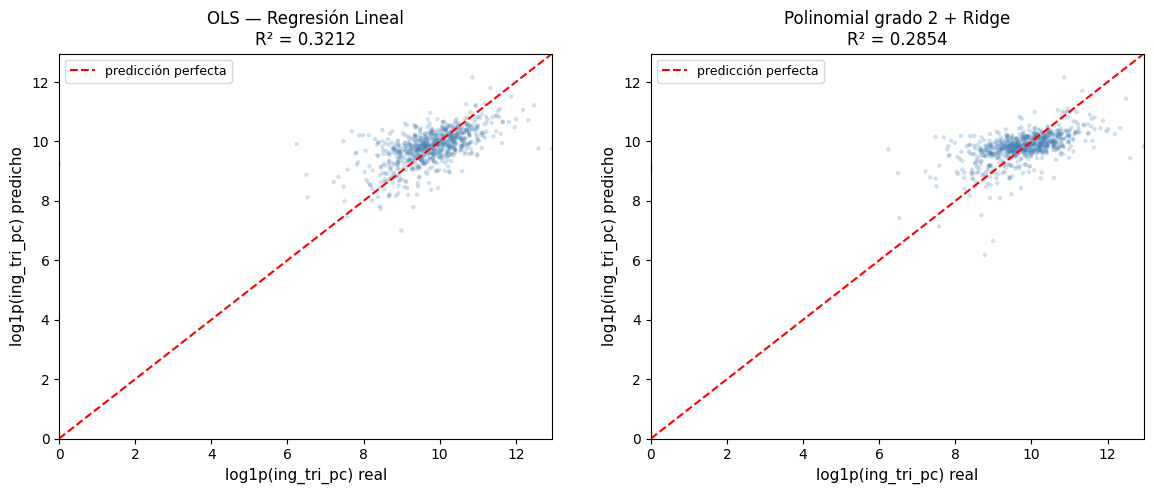

In [123]:
# ─── Tabla comparativa ────────────────────────────────────────────────────────
resultados = pd.DataFrame({
    "Modelo":    ["OLS — Lineal", "Polinomial g=2 + Ridge"],
    "R² (log)": [m_ols["R2"],   m_poly["R2"]],
    "RMSE (MXN)": [m_ols["RMSE"], m_poly["RMSE"]],
    "MAE (MXN)": [m_ols["MAE"],  m_poly["MAE"]],
    "MAPE (%)": [m_ols["MAPE"], m_poly["MAPE"]],
}).set_index("Modelo")

mejor = resultados["R² (log)"].idxmax()
print(f"✓ Mejor modelo por R²: {mejor}")
mejor_rmse = resultados["RMSE (MXN)"].idxmin()
print(f"✓ Mejor modelo por RMSE: {mejor_rmse}")

# ─── Gráfico: predicciones vs. valores reales ─────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

y_test_arr = np.array(y_test)

for ax, (y_pred, titulo) in zip(axes, [
    (np.array(y_pred_ols),  "OLS — Regresión Lineal"),
    (y_pred_poly,           "Polinomial grado 2 + Ridge"),
]):
    ax.scatter(y_test_arr, y_pred, alpha=0.25, s=10, color='steelblue', edgecolors='none')
    lo = min(y_test_arr.min(), y_pred.min())
    hi = max(y_test_arr.max(), y_pred.max())
    ax.plot([lo, hi], [lo, hi], 'r--', lw=1.5, label='predicción perfecta')
    r2_val = resultados.loc[
        "OLS — Lineal" if "Lineal" in titulo else "Polinomial g=2 + Ridge",
        "R² (log)"
    ]
    ax.set_xlabel("log1p(ing_tri_pc) real", fontsize=11)
    ax.set_ylabel("log1p(ing_tri_pc) predicho", fontsize=11)
    ax.set_title(f"{titulo}\nR² = {r2_val:.4f}", fontsize=12)
    ax.set_xlim(lo, hi); ax.set_ylim(lo, hi)
    ax.legend(fontsize=9)


Con base en las métricas del conjunto de prueba, concluimos que el modelo OLS lineal muestra un desempeño superior al modelo polinomial de segundo orden + Ridge, aunque con áreas claras de mejora:

__R²__ = 0.3212 — El modelo explica el 32% de la varianza del ingreso trimestral per cápita (en escala log). Esto significa que el 68% restante de la variabilidad queda sin explicar, lo cual es comprensible dado que las variables de vivienda disponibles en la ENIGH no capturan factores clave del ingreso como nivel educativo, ocupación o número de perceptores en el hogar.

__RMSE__ = 27,024 MXN — En promedio, las predicciones se desvían ~27,024 pesos de los valores reales. Contrastado con la LPI trimestral de referencia de CONEVAL (13,920 MXN), el error representa aproximadamente el 194% de esa línea, lo que indica que el modelo no tiene la precisión suficiente para clasificar hogares cerca del umbral de pobreza con confianza.

__MAE__ = 12,065 MXN — El error absoluto mediano es más bajo que el RMSE, lo que confirma la presencia de outliers de ingreso muy alto que inflan el RMSE desproporcionadamente. El hogar típico se predice con un error de ~12,065 MXN, equivalente al 87% de la LPI.

__MAPE__ = 69.26% — En promedio, el modelo se equivoca en un 69% del valor real del ingreso de cada hogar. Este es el indicador más revelador: un error porcentual tan alto sugiere que el modelo captura tendencias generales pero no es útil para predicción individual precisa.

## 7) Inferencia y conclusiones

Los resultados obtenidos permiten concluir que el modelo lineal (OLS) construido a partir de variables de vivienda de la ENIGH 2024 para Nuevo León no alcanza la precisión predictiva necesaria para determinar con confianza la situación socioeconómica de un hogar individual. Con un R² de 0.32 en el conjunto de prueba, el modelo explica apenas una tercera parte de la varianza del ingreso trimestral per cápita, y un MAPE de 69.26% evidencia que el error porcentual promedio es demasiado elevado para sustentar clasificaciones cercanas a los umbrales de pobreza definidos por CONEVAL. Esto es consistente con una limitación estructural del enfoque: las condiciones físicas y de servicios de la vivienda, si bien correlacionadas con el ingreso, no capturan factores determinantes como el nivel educativo de los integrantes, la ocupación, el número de perceptores de ingreso o la composición etaria del hogar.

En este sentido, los resultados refuerzan la pertinencia del modelo polinomial de grado 2 con regularización Ridge, cuya capacidad para aproximar relaciones no lineales y efectos de interacción entre variables ofrece una alternativa con mayor potencial predictivo, aunque a costa de la interpretabilidad directa de los coeficientes.

No obstante, ambos modelos comparten una limitación metodológica de fondo relacionada con la representatividad de ciertas condiciones de vida en la muestra. Las interacciones con menor peso en el modelo polinomial —cuyos coeficientes oscilan entre 10⁻⁷ y 10⁻⁸, como `lugar_coc_6 eli_basura_5`, `mat_techos_6 ab_agua_6` o `lugar_coc_5 combus_7`— no deben leerse como evidencia de que esas condiciones son irrelevantes para el bienestar del hogar. Por el contrario, estas combinaciones de categorías describen situaciones de precariedad extrema: hogares que cocinan a la intemperie sin acceso a un sistema formal de eliminación de basura, viviendas con techos de material endeble sin agua corriente, o carencia simultánea de combustible adecuado y electricidad regular. En términos sociales, estas condiciones constituyen emergencias humanitarias en materia de condiciones de vida. La razón por la que el modelo les asigna un peso prácticamente nulo es estrictamente estadística: hay tan pocas observaciones con esas características en el conjunto de entrenamiento que Ridge no puede estimar un efecto confiable y los penaliza hasta la irrelevancia numérica.

Esto abre una pregunta metodológica que la base de datos por sí sola no puede responder: ¿la baja frecuencia de estos perfiles en la ENIGH 2024 refleja fielmente su escasa prevalencia en Nuevo León, o es en parte producto de un sesgo de cobertura en la recolección de datos? Los hogares en condiciones de mayor marginalidad —asentamientos irregulares, zonas de difícil acceso, viviendas sin dirección formal— son precisamente los que presentan mayor riesgo de quedar fuera del marco muestral o de no ser contactados exitosamente por los encuestadores. Si existiera ese sesgo, el modelo no solo subestimaría la incidencia real de la pobreza extrema, sino que carecería de la información necesaria para aprender a identificarla. Con los datos disponibles, esta hipótesis no puede confirmarse ni descartarse, por lo que constituye una limitación que debe señalarse explícitamente al interpretar los resultados y al considerar cualquier aplicación de política pública derivada de este análisis.

Finalmente, una alternativa que puede complementar la regresion continua es replantear el problema como clasificacion mediante regresion logistica, usando ``est_socio`` como variable objetivo en lugar de ``ing_tri_pc``. Esto aporta una ventaja practica: el estrato socioeconomico (4 niveles ordinales definidos por INEGI) es mas accionable para politica publica y evita depender de estimaciones monetarias muy variables. Ademas, al ser ordinal, podria emplearse regresion logistica ordinal para respetar la jerarquia entre estratos sin asumir linealidad del ingreso. Aunque ``est_socio`` se excluyó como predictor por fuga de datos respecto a ``ing_tri_pc``, usarla como objetivo elimina ese problema y ofrece un enfoque potencialmente mas robusto ante outliers y la subrepresentacion de hogares en marginalidad extrema identificada como limitacion.

## 8) Referencias

CONEVAL. (n.d.). Glosario. https://www.coneval.org.mx/Medicion/Paginas/Glosario.aspx

Consejo Nacional de Evaluacion de la Politica de Desarrollo Social. (2025, 13 de enero). Lineas de pobreza por ingresos, diciembre 2024 [Informe]. https://www.coneval.org.mx

CONEVAL. (n.d.). Líneas de Pobreza por Ingresos Serie 1992-2024. https://www.coneval.org.mx/Medicion/MP/Paginas/Lineas_Pobreza_Ingresos_Serie_1992-2024.aspx